# Description
Task: to help marketers optimize costs.
Available data : 
server log with data on site visits,
all orders for this period,
statistics of advertising expenses.

We'll study:
* how people use the product
* when they start buying
* how much money does each client bring in
* when the customer pays off.

## Table of Contents

* [Loading and preparing data](#Шаг_1)
* [Building reports and counting metrics](#Шаг_2)
* [General conclusion](#Шаг_3)

<a id = 'Шаг_1' > </a> 
## Step 1. Loading and preparing the data

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
visits = pd.read_csv('visits_log.csv')
orders =  pd.read_csv('orders_log.csv')
costs = pd.read_csv('costs.csv')

In [4]:
#table of visits
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [5]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [6]:
visits.columns = ['device', 'end_ts', 'source_id','start_ts','uid']

In [7]:
visits['end_ts'] = pd.to_datetime(visits['end_ts'])
visits['start_ts'] = pd.to_datetime(visits['start_ts'])

In [8]:
visits.duplicated().sum()

0

##### Table visits (server log with information about site visits):
* uid - unique user ID
* device - user's device category
* start_ts - date and time of the session start
* end_ts - end date and time of the session
* source_id - ID of the advertising source from which the user came

In [9]:
# Table of orders
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [11]:
orders.columns = ['buy_ts', 'revenue','uid']
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])

In [12]:
orders.duplicated().sum()

0

##### orders table
* uid — the unique ID of the user who made the order
* buy_ts — order date and time
* revenue — revenue from this order

In [13]:
# Table of marketing costs
costs.tail()

,source_id,dt,costs
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15
2541,10,2018-05-31,17.60


In [14]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [15]:
costs['dt'] = pd.to_datetime(costs['dt'])

In [16]:
costs.duplicated().sum()

0

##### Table costs (information about marketing costs):
* source_id - id of the advertising source
* dt - date
* costs - costs for this advertising source on this day

### Conclusion

Loaded the data, renamed the columns, and converted the desired columns to the datetime type. There are no missing values or duplicates.
The data is ready for analysis.

<a id = 'Шаг_2' > </a> 
## Step 2. Building reports and counting metrics.

##### Product

* First, let's look at how many people use the site per day, week, month
To do this, we need to calculate the DAU, WAU, and MAU metrics.

Let's add columns with the values of the year, month, week, and the exact date of the visit to the dataframe.

In [17]:
visits['session_year'] = visits['start_ts'].dt.year
visits['session_month'] = visits['start_ts'].dt.month
visits['session_week'] = visits['start_ts'].dt.week
visits['session_date'] = visits['start_ts'].dt.date

In [18]:
visits

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27
...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017,7,30,2017-07-29
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018,1,4,2018-01-25
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018,3,9,2018-03-03
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017,11,44,2017-11-02


#### Metrics

In [19]:
# We will output the dau, wau, and mau metrics for various sources
for source in visits['source_id'].sort_values().unique():
    # sticky factor
    update_visits = visits.query('source_id == @source')
    dau_total = update_visits.groupby('session_date').agg({'uid':'nunique'})
    wau_total = update_visits.groupby(['session_year', 'session_week']).agg({'uid':'nunique'})
    mau_total = update_visits.groupby(['session_year', 'session_month']).agg({'uid':'nunique'})   
    # divided by devices
    update_visits_mobile = update_visits.query('device == "touch"')
    update_visits_deskt = update_visits.query('device == "desktop"')
    dau_total_mobile = update_visits_mobile.groupby('session_date').agg({'uid':'nunique'})
    dau_total_deskt = update_visits_deskt.groupby('session_date').agg({'uid':'nunique'})
    wau_total_mobile = update_visits_mobile.groupby(['session_year', 'session_week']).agg({'uid':'nunique'})
    wau_total_deskt = update_visits_deskt.groupby(['session_year', 'session_week']).agg({'uid':'nunique'})
    mau_total_mobile = update_visits_mobile.groupby(['session_year', 'session_month']).agg({'uid':'nunique'})
    mau_total_deskt = update_visits_deskt.groupby(['session_year', 'session_month']).agg({'uid':'nunique'})
    sticky_fac_wau = (dau_total.mean() / wau_total.mean())  
    sticky_fac_mau = (dau_total.mean() / mau_total.mean()) 
    print('Source:', source)
    print('On average, the service is used by {} people who log in from a computer every day'.format(int(dau_total_deskt.mean())))
    print('On average, the service is used by {} people who log in from mobile devices every day'.format(int(dau_total_mobile.mean())))
    print()
    print('On average, the service is used by {} people who log in from a computer every week'.format(int(wau_total_deskt.mean())))
    print('On average, the service is used by {} people who log in from mobile devices every week'.format(int(wau_total_mobile.mean())))
    print()
    print('On average, the service is used by {} people who log in from a computer every month'.format(int(mau_total_deskt.mean())))
    print('On average, the service is used by {} people who log in from mobile devices every month'.format(int(mau_total_mobile.mean())))
    print('sticky factor(week): {:.2%}'.format(float(sticky_fac_wau)))
    print('sticky factor(month): {:.2%}'.format(float(sticky_fac_mau)))
    
    print()

Source: 1
On average, the service is used by 59 people who log in from a computer every day
On average, the service is used by 20 people who log in from mobile devices every day

On average, the service is used by 334 people who log in from a computer every week
On average, the service is used by 131 people who log in from mobile devices every week

On average, the service is used by 1284 people who log in from a computer every month
On average, the service is used by 547 people who log in from mobile devices every month
sticky factor(week): 17.38%
sticky factor(month): 4.43%

Source: 2
On average, the service is used by 89 people who log in from a computer every day
On average, the service is used by 31 people who log in from mobile devices every day

On average, the service is used by 522 people who log in from a computer every week
On average, the service is used by 198 people who log in from mobile devices every week

On average, the service is used by 1965 people who log in from a

Based on the results obtained, we can exclude sources 6 and 7 from the analysis. The best results are shown by sources 1,2 and 10. Let's build graphs of changes in the number of users by month for different sources. Sticky factor shows quite low results for all sources. However, for an information portal, there is no need to retain users, as in games, so the result is probably adequate.


In [20]:
visits_plot = visits.query('source_id in [1,2,3,4,5,9,10]')

In [21]:
visits_plot['session_month'] = visits_plot['session_date'].astype('datetime64[M]')

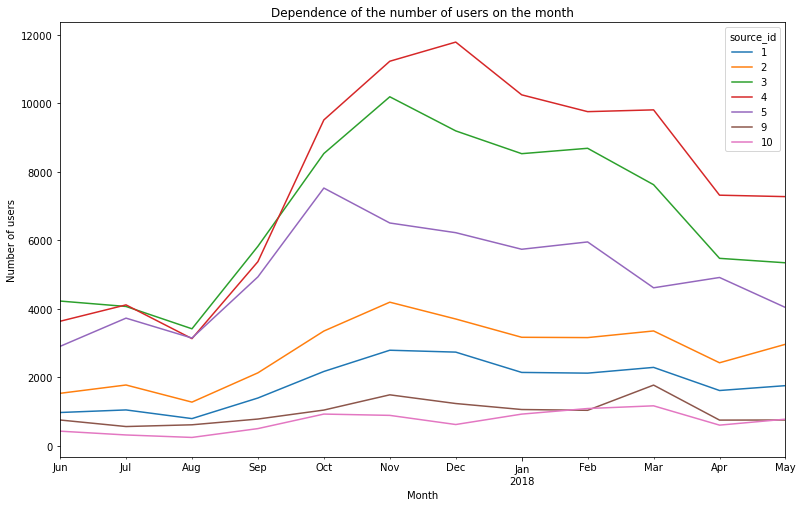

In [22]:
final_plot = visits_plot.pivot_table(index ='session_month', 
                               columns = 'source_id', values = 'uid', 
                               aggfunc = 'nunique').plot(figsize = (13,8))
final_plot.set_xlabel('Month')
final_plot.set_ylabel('Number of users')
plt.title('Dependence of the number of users on the month')              
plt.show()

From the graph, we can see that historically, the largest number of users came from 3, 4, 5 advertising sources. The source 2 also showed good results, while it was on the rise at the time of the end of observations, despite the general decline.

* User sessions

First, consider the number of sessions per day

In [23]:
sessions_per_user = visits.groupby(['session_date','session_month']).agg({'uid':['count','nunique']})
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sessions_per_user'] = sessions_per_user['n_sessions'] / sessions_per_user['n_users']
print(sessions_per_user) 

                            n_sessions  n_users  sessions_per_user
session_date session_month                                        
2017-06-01   6                     664      605           1.097521
2017-06-02   6                     658      608           1.082237
2017-06-03   6                     477      445           1.071910
2017-06-04   6                     510      476           1.071429
2017-06-05   6                     893      820           1.089024
...                                ...      ...                ...
2018-05-27   5                     672      620           1.083871
2018-05-28   5                    1156     1039           1.112608
2018-05-29   5                    1035      948           1.091772
2018-05-30   5                    1410     1289           1.093871
2018-05-31   5                    2256     1997           1.129695

[364 rows x 3 columns]


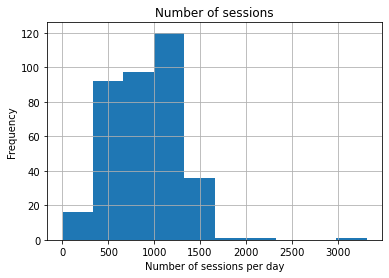

In [24]:
plot = sessions_per_user['n_users'].hist()
plt.title('Number of sessions')
plot.set_xlabel('Number of sessions per day')
plot.set_ylabel('Frequency')
plt.show()

In [25]:
sessions_per_user['n_users'].median()

921.0

In [26]:
sessions_per_user[(sessions_per_user['n_users'] < 100) | (sessions_per_user['n_users'] > 2500)]['n_users']

session_date  session_month
2017-11-24    11               3319
2018-03-31    3                   1
Name: n_users, dtype: int64

The average session is 921 sessions per day, and there are outliers, for example, 3319 or 1. They are probably due to some technical error. At the same time, each user has a little more than one session. It is possible that some users double-check the information during the day.

##### Next we'll calculate the average session duration.

In [27]:
visits['session_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
visits['session_duration_sec'].mean()

643.506488592098

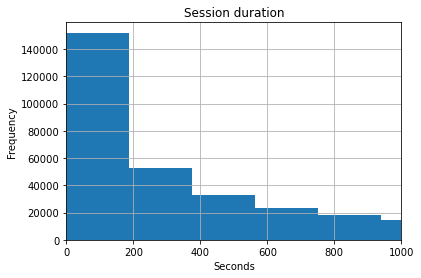

In [28]:
plt.title('Session duration')
plot = visits['session_duration_sec'].hist(bins = 450)
plot.set_xlim([0,1000])
plot.set_xlabel('Seconds')
plot.set_ylabel('Frequency')
plt.show()

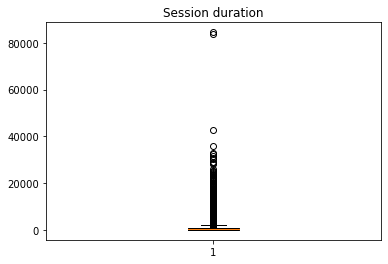

In [29]:
plt.title('Session duration')
plt.boxplot(visits['session_duration_sec'])
plt.show()

Let's calculate the mode of the session time, since the distribution is not normal.

In [30]:
asl = visits['session_duration_sec'].mode()
asl

0    60
dtype: int64

* Calculation if retention rate using cohort analysis.

#### Monthly cohorts

In [31]:
first_activity_date = visits.groupby('uid')['start_ts'].min()
first_activity_date.name = 'first_activity_date'
visits = visits.join(first_activity_date, on = 'uid')
visits

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_duration_sec,first_activity_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080,2017-12-20 17:20:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680,2018-02-19 16:53:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0,2017-07-01 01:54:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440,2018-03-09 20:05:00
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,0,2017-12-27 14:06:00
...,...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017,7,30,2017-07-29,19,2017-07-29 19:07:00
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018,1,4,2018-01-25,19,2018-01-25 17:38:00
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018,3,9,2018-03-03,19,2018-03-03 10:12:00
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017,11,44,2017-11-02,19,2017-11-02 10:12:00


In [32]:
visits['first_activity_month'] = visits['first_activity_date'].astype('datetime64[M]')

In [33]:
visits['session_month'] = visits['session_date'].astype('datetime64[M]')

In [34]:
visits['cohort_lifetime'] = visits['session_month'] - visits['first_activity_month']
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1, 'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype(int)

In [35]:
cohorts = visits.groupby(['first_activity_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index() 
cohorts

,first_activity_month,cohort_lifetime,uid
0,2017-06-01,0,13259
1,2017-06-01,1,1043
2,2017-06-01,2,713
3,2017-06-01,3,814
4,2017-06-01,4,909
...,...,...,...
73,2018-03-01,1,861
74,2018-03-01,2,557
75,2018-04-01,0,15709
76,2018-04-01,1,760


#### The initial number of users in the cohort.

In [36]:
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_month','uid']]
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'}) 

In [37]:
cohorts = cohorts.merge(initial_users_count,on='first_activity_month')
cohorts

,first_activity_month,cohort_lifetime,uid,cohort_users
0,2017-06-01,0,13259,13259
1,2017-06-01,1,1043,13259
2,2017-06-01,2,713,13259
3,2017-06-01,3,814,13259
4,2017-06-01,4,909,13259
...,...,...,...,...
73,2018-03-01,1,861,20589
74,2018-03-01,2,557,20589
75,2018-04-01,0,15709,15709
76,2018-04-01,1,760,15709


Let's calculate the Retention Rate. We divide the number of active users in each of the months by the original number of users in the cohort.

In [38]:
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']

In [39]:
retention_pivot = cohorts.pivot_table(index='first_activity_month',columns='cohort_lifetime',
                                      values='retention',aggfunc='sum')
#Removing the column of the first month in which retention rate = 100%, for better visualization
retention_pivot = retention_pivot.drop(columns = 0)

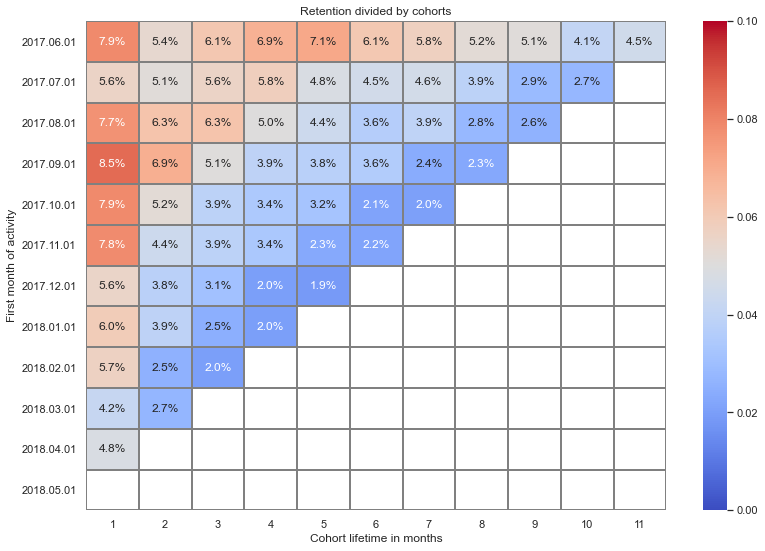

In [40]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Retention divided by cohorts')
plot = sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', vmin = 0, vmax = 0.1, 
            cmap = 'coolwarm', yticklabels=retention_pivot.index.strftime('%Y.%m.%d'))
plot.set_xlabel('Cohort lifetime in months')
plot.set_ylabel('First month of activity')
plt.show()

We see that the retention rate was best preserved in the first cohort. With each subsequent cohort, the period before a severe fall decreases. If for the first cohort(June 2017), a difference of three percent was achieved only by the 8th month, then, for example, for the 5th(October 2017) cohort, a difference of 3 percent is achieved by the second month.
A possible reason is the large number of services that sell tickets to various events.
It is possible that inconvenient innovations were introduced over time, or the quality of the support service fell, as well as inefficient traffic sources were selected in July 2017 and December-April 2018, because there the user retention in the first month is inferior to the value for half the life time of the first cohort.

##### Sales

* When do people start buying?

Let's calculate the time from the first session to the first purchase.

Adding the date of the first activity and the date of the first purchase to the orders table.

In [41]:
orders = orders.join(first_activity_date, on = 'uid')
orders

,buy_ts,revenue,uid,first_activity_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00
...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31 09:11:00
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31 23:05:00
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:52:00
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2017-10-23 12:32:00


In [42]:
first_buy = orders.groupby('uid')['buy_ts'].min()
first_buy.name = 'first_buy'
orders = orders.join(first_buy, on = 'uid')
orders

,buy_ts,revenue,uid,first_activity_date,first_buy
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00,2017-06-01 00:10:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00,2017-06-01 00:25:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00,2017-06-01 00:27:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00,2017-06-01 00:29:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00,2017-06-01 07:58:00
...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31 09:11:00,2018-05-31 23:50:00
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31 23:05:00,2018-05-31 23:50:00
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:52:00,2018-05-31 23:54:00
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2017-10-23 12:32:00,2018-05-31 23:56:00


Now we subtract the date of the first session from the purchase date and get the time in seconds.

In [43]:
orders['seconds_before_purchase'] = orders['first_buy'] - orders['first_activity_date']
orders['seconds_before_purchase'] = orders['seconds_before_purchase'] / np.timedelta64(1, 's')
orders['seconds_before_purchase'] = orders['seconds_before_purchase'].round().astype(int)
orders

,buy_ts,revenue,uid,first_activity_date,first_buy,seconds_before_purchase
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00,2017-06-01 00:10:00,60
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00,2017-06-01 00:25:00,660
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00,2017-06-01 00:27:00,120
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00,2017-06-01 00:29:00,900
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00,2017-06-01 07:58:00,1620
...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31 09:11:00,2018-05-31 23:50:00,52740
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31 23:05:00,2018-05-31 23:50:00,2700
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:52:00,2018-05-31 23:54:00,120
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2017-10-23 12:32:00,2018-05-31 23:56:00,19049040


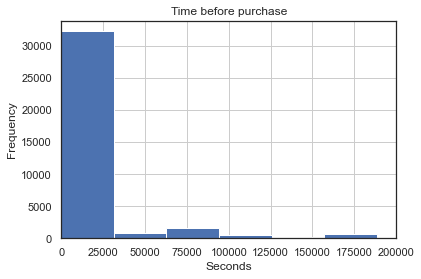

In [44]:
plot = orders['seconds_before_purchase'].hist(bins = 1000)
plt.title('Time before purchase')
plt.xlabel('Seconds')
plt.ylabel('Frequency')
plot.set_xlim([0,200000])
plt.show()

In [45]:
orders['seconds_before_purchase'].median()

1320.0

The median time to the first purchase is 1320 seconds. That is, on average, users need about 20 minutes to make a purchase. The previously stated hypothesis that the average session is short for making a purchase is confirmed.

#### Let's count the number of purchases per month.

In [46]:
orders

,buy_ts,revenue,uid,first_activity_date,first_buy,seconds_before_purchase
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00,2017-06-01 00:10:00,60
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00,2017-06-01 00:25:00,660
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00,2017-06-01 00:27:00,120
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00,2017-06-01 00:29:00,900
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00,2017-06-01 07:58:00,1620
...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31 09:11:00,2018-05-31 23:50:00,52740
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31 23:05:00,2018-05-31 23:50:00,2700
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:52:00,2018-05-31 23:54:00,120
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2017-10-23 12:32:00,2018-05-31 23:56:00,19049040


In [47]:
orders['buy_year'] = orders['buy_ts'].dt.year
orders['buy_month'] = orders['buy_ts'].dt.month

In [48]:
merged_orders = visits.merge(orders, on = 'uid')
merged_orders

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_duration_sec,first_activity_date_x,first_activity_month,cohort_lifetime,buy_ts,revenue,first_activity_date_y,first_buy,seconds_before_purchase,buy_year,buy_month
0,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,20,2018-05-20,1440,2018-03-09 20:05:00,2018-03-01,2,2018-03-09 20:25:00,2.33,2018-03-09 20:05:00,2018-03-09 20:25:00,1200,2018,3
1,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018,2018-03-01,10,2018-03-09,1680,2018-03-09 20:05:00,2018-03-01,0,2018-03-09 20:25:00,2.33,2018-03-09 20:05:00,2018-03-09 20:25:00,1200,2018,3
2,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017,2017-09-01,35,2017-09-03,60,2017-09-03 21:35:00,2017-09-01,0,2017-09-04 12:46:00,2.44,2017-09-03 21:35:00,2017-09-04 12:46:00,54660,2017,9
3,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017,2017-09-01,35,2017-09-03,60,2017-09-03 21:35:00,2017-09-01,0,2017-10-28 00:01:00,1.53,2017-09-03 21:35:00,2017-09-04 12:46:00,54660,2017,10
4,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017,2017-09-01,35,2017-09-03,60,2017-09-03 21:35:00,2017-09-01,0,2017-10-28 19:16:00,1.53,2017-09-03 21:35:00,2017-09-04 12:46:00,54660,2017,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761802,desktop,2017-12-04 12:50:00,3,2017-12-04 12:42:00,6752020629696526518,2017,2017-12-01,49,2017-12-04,480,2017-12-04 12:42:00,2017-12-01,0,2017-12-04 12:46:00,4.15,2017-12-04 12:42:00,2017-12-04 12:46:00,240,2017,12
761803,desktop,2017-11-20 23:44:00,4,2017-11-20 23:33:00,11750532881998794555,2017,2017-11-01,47,2017-11-20,660,2017-11-20 23:33:00,2017-11-01,0,2017-11-20 23:43:00,3.67,2017-11-20 23:33:00,2017-11-20 23:43:00,600,2017,11
761804,touch,2017-11-29 20:48:00,4,2017-11-29 20:27:00,11202626539189016002,2017,2017-11-01,48,2017-11-29,1260,2017-11-29 20:27:00,2017-11-01,0,2017-11-29 20:33:00,3.05,2017-11-29 20:27:00,2017-11-29 20:33:00,360,2017,11
761805,desktop,2018-04-23 21:19:00,10,2018-04-23 21:11:00,12734910664455613822,2018,2018-04-01,17,2018-04-23,480,2018-04-23 21:11:00,2018-04-01,0,2018-04-23 21:16:00,0.49,2018-04-23 21:11:00,2018-04-23 21:16:00,300,2018,4


In [49]:
for source in merged_orders['source_id'].sort_values().unique():
    if source != 7 :
        update_orders_mobile = merged_orders.query('source_id == @source & device == "touch"')
        update_orders_deskt = merged_orders.query('source_id == @source & device == "desktop"')
        month_purchases_mobile = update_orders_mobile.groupby(['buy_year', 'buy_month']).agg({'uid':'nunique'})
        month_purchases_deskt = update_orders_deskt.groupby(['buy_year', 'buy_month']).agg({'uid':'nunique'})
        print('Source:', source)
        print('Average number of purchases on mobile devices: {} '.format(int(month_purchases_mobile.mean().round())))
        print('Average number of purchases on computers: {} '.format(int(month_purchases_deskt.mean().round())))
        print()

Source: 1
Average number of purchases on mobile devices: 185 
Average number of purchases on computers: 608 

Source: 2
Average number of purchases on mobile devices: 212 
Average number of purchases on computers: 638 

Source: 3
Average number of purchases on mobile devices: 266 
Average number of purchases on computers: 1160 

Source: 4
Average number of purchases on mobile devices: 360 
Average number of purchases on computers: 1031 

Source: 5
Average number of purchases on mobile devices: 184 
Average number of purchases on computers: 853 

Source: 9
Average number of purchases on mobile devices: 68 
Average number of purchases on computers: 254 

Source: 10
Average number of purchases on mobile devices: 38 
Average number of purchases on computers: 136 



It can be seen that purchases are made mainly from computers. At the same time, most people buy from the 3rd source(computers)-1160 times per month and from the 4th source(mobile devices) - 360 times per month. This is natural, since the most users come from 3 and 4 sources. 1,2 and 5 sources also look promising from the point of view of attraction, since a fairly large part of the incoming users make purchases.

#### Average check

In [50]:
orders['month'] = orders['buy_ts'].astype('datetime64[M]')
orders

,buy_ts,revenue,uid,first_activity_date,first_buy,seconds_before_purchase,buy_year,buy_month,month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00,2017-06-01 00:10:00,60,2017,6,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00,2017-06-01 00:25:00,660,2017,6,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00,2017-06-01 00:27:00,120,2017,6,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00,2017-06-01 00:29:00,900,2017,6,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00,2017-06-01 07:58:00,1620,2017,6,2017-06-01
...,...,...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31 09:11:00,2018-05-31 23:50:00,52740,2018,5,2018-05-01
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31 23:05:00,2018-05-31 23:50:00,2700,2018,5,2018-05-01
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:52:00,2018-05-31 23:54:00,120,2018,5,2018-05-01
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2017-10-23 12:32:00,2018-05-31 23:56:00,19049040,2018,5,2018-05-01


In [51]:
orders_grouped = orders.groupby(['month','uid',]).agg({'revenue':['sum','count']}).reset_index()
orders_grouped.columns = ['month','uid','sum_revenue','count']
orders_grouped['average_check'] = orders_grouped['sum_revenue'] / orders_grouped['count']
orders_grouped = orders_grouped.query('month < "2018-06-01"')


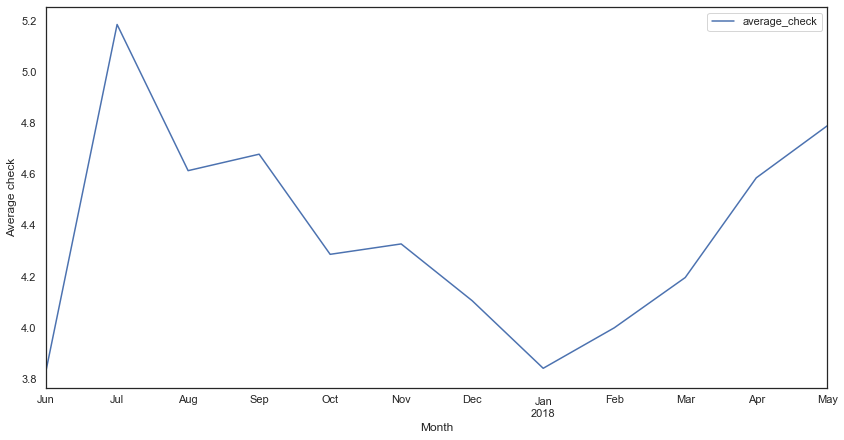

In [52]:
plot = orders_grouped.pivot_table(index = 'month',values = 'average_check').plot(figsize = (14,7))
plot.set_xlabel('Month')
plot.set_ylabel('Average check')
plt.show()

In [54]:
# average check
round(orders_grouped['average_check'].mean(),2)

4.31

In [56]:
# average number of purchases
round(orders_grouped['count'].mean(),2)

1.23

The average value of the average check metric = 4.31. The chart shows that the highest average check was observed in July 2017. Since this month, the average receipt has been falling, despite the growth in the number of users, probably the purchase was inconvenient, or the assortment was too small for the increasing user flow, while in 2018 the receipt began to increase and almost reached the peak values of 2017. Perhaps some promotions have been successfully introduced, the range has increased, prices have increased in general, or the purchase has become more convenient.

Also, on average, users make purchases a little more than 1 time. Thanks to this, we can say that the economy of a single sale is likely to fairly objectively reflect the situation.

#### Let's calculate the LTV dividing the buyers into monthly cohorts.

In [57]:
orders

,buy_ts,revenue,uid,first_activity_date,first_buy,seconds_before_purchase,buy_year,buy_month,month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00,2017-06-01 00:10:00,60,2017,6,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00,2017-06-01 00:25:00,660,2017,6,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00,2017-06-01 00:27:00,120,2017,6,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00,2017-06-01 00:29:00,900,2017,6,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00,2017-06-01 07:58:00,1620,2017,6,2017-06-01
...,...,...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31 09:11:00,2018-05-31 23:50:00,52740,2018,5,2018-05-01
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31 23:05:00,2018-05-31 23:50:00,2700,2018,5,2018-05-01
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:52:00,2018-05-31 23:54:00,120,2018,5,2018-05-01
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2017-10-23 12:32:00,2018-05-31 23:56:00,19049040,2018,5,2018-05-01


In [58]:
# Month of first purchase
first_orders = orders.groupby('uid').agg({'month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
print(first_orders.head()) 

                uid first_order_month
0   313578113262317        2018-01-01
1  1575281904278712        2017-06-01
2  2429014661409475        2017-10-01
3  2464366381792757        2018-01-01
4  2551852515556206        2017-11-01


In [59]:
# New users per month
cohort_sizes2 = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes2.columns = ['first_order_month', 'n_buyers']
print(cohort_sizes2.head()) 

  first_order_month  n_buyers
0        2017-06-01      2023
1        2017-07-01      1923
2        2017-08-01      1370
3        2017-09-01      2581
4        2017-10-01      4340


###### Let's build cohorts. Firstly, add the month of each customer's first purchase to the table with orders

In [60]:
orders_new = pd.merge(orders,first_orders, on='uid')
orders_new.head()

,buy_ts,revenue,uid,first_activity_date,first_buy,seconds_before_purchase,buy_year,buy_month,month,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00,2017-06-01 00:10:00,60,2017,6,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00,2017-06-01 00:25:00,660,2017,6,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00,2017-06-01 00:27:00,120,2017,6,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00,2017-06-01 00:29:00,900,2017,6,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00,2017-06-01 07:58:00,1620,2017,6,2017-06-01,2017-06-01


In [61]:
cohorts2 = orders_new.groupby(['first_order_month','month']).agg({'revenue': 'sum'}).reset_index()
cohorts2.head()

,first_order_month,month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


In [62]:
report = pd.merge(cohort_sizes2, cohorts2, on='first_order_month')
report

,first_order_month,n_buyers,month,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58
...,...,...,...,...
74,2018-03-01,3533,2018-05-01,1114.87
75,2018-04-01,2276,2018-04-01,10600.69
76,2018-04-01,2276,2018-05-01,1209.92
77,2018-05-01,2988,2018-05-01,13925.76


In [63]:
# margin rate is unknown, therefore let's take it equals 1
margin_rate = 1
    
report['gp'] = report['revenue'] * margin_rate
report['age'] = (report['month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
report = report.query('age < 7')
print(report.head()) 

  first_order_month  n_buyers      month  revenue       gp  age
0        2017-06-01      2023 2017-06-01  9557.49  9557.49    0
1        2017-06-01      2023 2017-07-01   981.82   981.82    1
2        2017-06-01      2023 2017-08-01   885.34   885.34    2
3        2017-06-01      2023 2017-09-01  1931.30  1931.30    3
4        2017-06-01      2023 2017-10-01  2068.58  2068.58    4


In [64]:
report['ltv'] = report['gp'] / report['n_buyers']
    
output = report.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='ltv', 
        aggfunc='mean').round(3)
    
output.fillna('') 

age,0,1,2,3,4,5,6
first_order_month,,,,,,,
2017-06-01,4.724,0.485,0.438,0.955,1.023,0.736,0.95
2017-07-01,6.010,0.335,0.624,0.359,0.177,0.156,0.12
2017-08-01,5.277,0.472,0.458,0.391,0.494,0.284,0.211
2017-09-01,5.645,1.118,0.521,3.976,0.401,0.647,0.702
2017-10-01,5.004,0.536,0.191,0.157,0.152,0.12,0.085
2017-11-01,5.155,0.399,0.2,0.325,0.148,0.054,0.115
2017-12-01,4.738,0.26,0.925,1.065,0.313,0.338,
2018-01-01,4.136,0.295,0.304,0.143,0.063,,
2018-02-01,4.157,0.278,0.079,0.074,,,


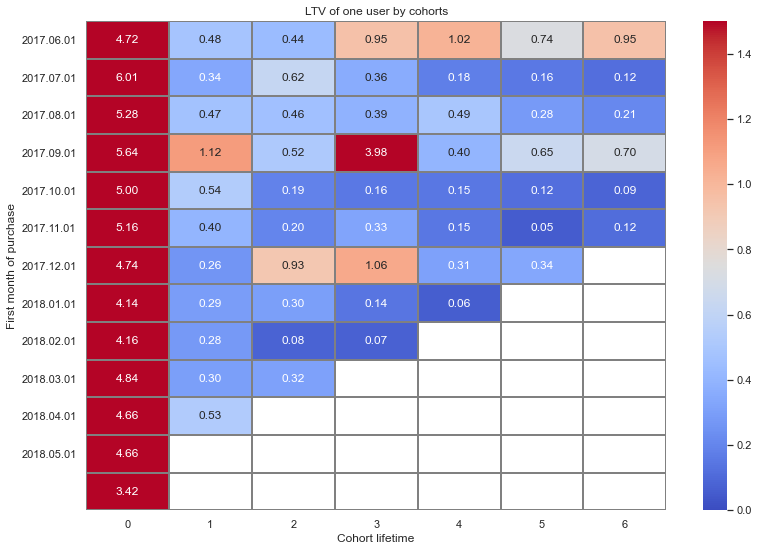

In [65]:
# Building heatmap
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('LTV of one user by cohorts')
plot = sns.heatmap(output, annot=True, fmt='.2f', linewidths=1, linecolor='gray', vmin = 0, vmax = 1.5, 
            cmap = 'coolwarm', yticklabels=retention_pivot.index.strftime('%Y.%m.%d'))
plot.set_xlabel('Cohort lifetime')
plot.set_ylabel('First month of purchase')
plt.show()

Consider the first 6 cohorts that have a lifetime of 7 months or more. Let's calculate the LTV for these cohorts for 7 months.

In [66]:
upd_output = report.query('first_order_month <"2017-12-01"')

In [67]:
ltv_output = upd_output.pivot_table(
index = 'first_order_month',
columns = 'age',
values = 'ltv',
aggfunc = 'mean')
ltv_output = ltv_output.cumsum(axis = 1)
ltv_output

age,0,1,2,3,4,5,6
first_order_month,,,,,,,
2017-06-01,4.724414,5.209743,5.647380,6.602051,7.624582,8.360084,9.310524
2017-07-01,6.010218,6.345429,6.968960,7.327936,7.504727,7.660775,7.780983
2017-08-01,5.276518,5.748511,6.206993,6.598270,7.092321,7.375861,7.586526
2017-09-01,5.644529,6.762115,7.283045,11.258838,11.659396,12.306463,13.008071
2017-10-01,5.003733,5.539495,5.730889,5.888035,6.039594,6.159956,6.244772
2017-11-01,5.154683,5.553916,5.753472,6.078424,6.226437,6.280316,6.395244


In [70]:
round(ltv_output[6].mean(),2)

8.39

We see that on average, the user brings in 8.39 USD for the lifetime. The largest amount of money was brought by a user from the September cohort, the heat map shows that there was a significant outlier in the 4th month of life. Most likely, an abnormally high purchase was made, which increased the average, this is rather an exception to the general trend. Nevertheless, the user of the September cohort, even without this outlier, brought one of the greatest benefits.

##### Marketing

In [71]:
costs

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


* How much money was spent? Total / per source / by time

In [72]:
costs['month'] = costs['dt'].astype('datetime64[M]')

In [73]:
costs_source = costs.groupby('source_id').agg({'costs':'sum'})
costs_time = costs.pivot_table(index = 'month', columns = 'source_id',
                               values = 'costs',
                               aggfunc = 'mean'
                              )

In [74]:
# total costs
costs_source.sum()

costs    329131.62
dtype: float64

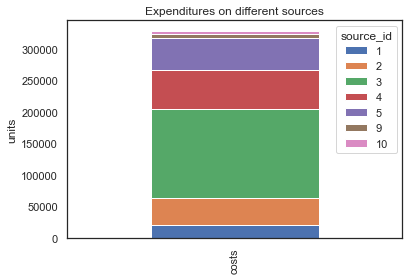

In [75]:
# per source
plot = costs_source.T.plot(kind = 'bar', stacked = True)
plt.title('Expenditures on different sources')
plot.set_ylabel('units')
plt.show()

In [76]:
costs_source

,costs
source_id,
1,20833.27
2,42806.04
3,141321.63
4,61073.60
5,51757.10
9,5517.49
10,5822.49


From the table and the graph, we can see that the most money was spent on the 3rd channel of attraction(141321.63), followed by the 4th and 5th.

In [77]:
# Change over time
costs_time

source_id,1,2,3,4,5,9,10
month,,,,,,,
2017-06-01,37.520333,80.912667,257.721667,117.160000,87.204000,9.507333,10.474000
2017-07-01,34.609032,75.261613,247.560323,113.862258,96.714194,9.759355,10.639355
2017-08-01,30.703548,58.420968,198.178710,103.785806,70.492903,8.030000,7.502258
2017-09-01,50.067000,99.522000,332.118333,173.075333,128.304667,13.854000,15.355667
2017-10-01,74.701613,156.290323,507.652903,207.123871,186.045161,19.658387,20.233548
2017-11-01,81.505333,174.922667,567.511333,179.627333,210.844667,22.772667,26.412000
2017-12-01,75.522581,157.993548,523.210323,247.757097,189.436129,21.225161,20.834194
2018-01-01,70.521935,134.120645,477.702581,188.154516,173.274839,17.650323,19.817742
2018-02-01,78.731429,159.797857,508.162857,203.998571,181.118214,19.696429,17.174286


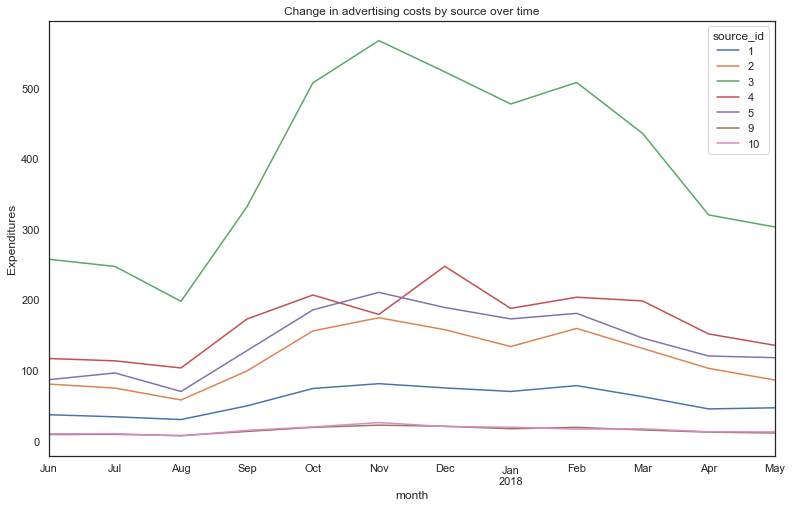

In [78]:
plot = costs_time.plot(figsize=(13,8))
plt.title('Change in advertising costs by source over time')
plot.set_ylabel('Expenditures')
plt.show()

From the graph, we can see that since the beginning of 2018, the costs for all sources have started to fall. Perhaps this is due to the optimization of expenses, because, for example, the average check at this time began to grow, it is likely to make purchases more convenient, perhaps there were some loyalty programs or bonuses that required additional expenses, as a result of which the marketing budget was cut.

#### The cost of attracting one buyer from each source
Let's calculate LTV using cohort analysis by sources.

In [79]:
#Let's determine the user's source from the first click
sources = visits.sort_values(by = ['uid','start_ts']).groupby('uid').agg(
    {'source_id':'first'}
)

ltv = orders.merge(sources, on = 'uid') 
ltv['lifetime'] = ((ltv['buy_ts'] - ltv['first_buy']) / 
                   np.timedelta64(1,'M')).round().astype(int)
#ltv

orders_lifetime = ltv.pivot_table(index = 'source_id', 
                                  columns  = 'lifetime',values = 'revenue',aggfunc = 'count').fillna(0)
buyers_lifetime = ltv.pivot_table(index = 'source_id', columns = 'lifetime',values = 'revenue',
                                 aggfunc = 'nunique').fillna(0)
cohort_sizes = ltv.groupby('source_id').agg({'uid':'nunique'}).rename(columns = {'uid':'cohort_size'})
ltv = ltv.pivot_table(index = 'source_id', columns = 'lifetime', values = 'revenue', aggfunc='sum').fillna(0)
ltv = ltv.cumsum(axis = 1)
ltv = ltv.merge(cohort_sizes, on = 'source_id')
ltv = ltv.div(ltv['cohort_size'], axis = 0).drop(columns = 'cohort_size')
ltv 

,0,1,2,3,4,5,6,7,8,9,10,11,12
source_id,,,,,,,,,,,,,
1,6.156185,7.150835,7.891156,8.537754,9.029303,9.251083,9.525826,9.866858,10.191256,10.450862,10.557561,10.673508,10.724577
2,6.770593,8.054740,9.717921,11.253637,11.900125,12.484390,12.721418,12.948380,13.171358,13.233560,13.346994,13.380422,13.383802
3,4.477694,4.729283,4.865748,5.008149,5.083093,5.122590,5.147003,5.173669,5.192354,5.197477,5.202699,5.203834,5.204931
4,4.584762,4.738128,4.852278,4.948617,5.068362,5.226563,5.342363,5.391025,5.410340,5.448244,5.502627,5.505380,5.506685
5,4.909883,5.114191,5.469974,6.836748,7.072747,7.246335,7.365203,7.454998,7.515129,7.576270,7.582746,7.592303,7.592558
7,1.220000,1.220000,1.220000,1.220000,1.220000,1.220000,1.220000,1.220000,1.220000,1.220000,1.220000,1.220000,1.220000
9,3.880901,4.167390,4.408024,4.678888,4.788189,4.935588,5.059127,5.126608,5.244430,5.284972,5.293566,5.293566,5.293566
10,3.164131,3.227434,3.254695,3.302558,3.316576,3.319217,3.332724,3.343348,3.346102,3.348631,3.348631,3.348631,3.348631


#### Counting CAC metric.

In [80]:
cac = costs.groupby('source_id').agg({'costs':'sum'}).merge(cohort_sizes, on = 'source_id')
cac['cac'] = cac['costs'] / cac['cohort_size']
cac

,costs,cohort_size,cac
source_id,,,
1,20833.27,2899,7.186364
2,42806.04,3506,12.209367
3,141321.63,10473,13.493901
4,61073.60,10296,5.931779
5,51757.10,6931,7.467479
9,5517.49,1088,5.071222
10,5822.49,1329,4.381106


As a result, we see that most of all is spent on the buyer from the 3rd and 2nd sources.

* How much did the expenses pay off?
Let's calculate the ROI.

In [81]:
roi = ltv.merge(cac['cac'], on = 'source_id')
roi = roi.div(roi['cac'],axis = 0).drop(columns = 'cac')
roi

,0,1,2,3,4,5,6,7,8,9,10,11,12
source_id,,,,,,,,,,,,,
1,0.856648,0.995056,1.098073,1.188049,1.256449,1.287311,1.325542,1.372997,1.418138,1.454263,1.469110,1.485245,1.492351
2,0.554541,0.659718,0.795940,0.921722,0.974672,1.022526,1.041939,1.060528,1.078791,1.083886,1.093177,1.095915,1.096191
3,0.331831,0.350476,0.360589,0.371142,0.376696,0.379623,0.381432,0.383408,0.384793,0.385172,0.385559,0.385643,0.385725
4,0.772915,0.798770,0.818014,0.834255,0.854442,0.881112,0.900634,0.908838,0.912094,0.918484,0.927652,0.928116,0.928336
5,0.657502,0.684862,0.732506,0.915536,0.947140,0.970386,0.986304,0.998329,1.006381,1.014569,1.015436,1.016716,1.016750
9,0.765279,0.821772,0.869223,0.922635,0.944188,0.973254,0.997615,1.010922,1.034155,1.042150,1.043844,1.043844,1.043844
10,0.722222,0.736671,0.742894,0.753818,0.757018,0.757621,0.760704,0.763129,0.763757,0.764335,0.764335,0.764335,0.764335


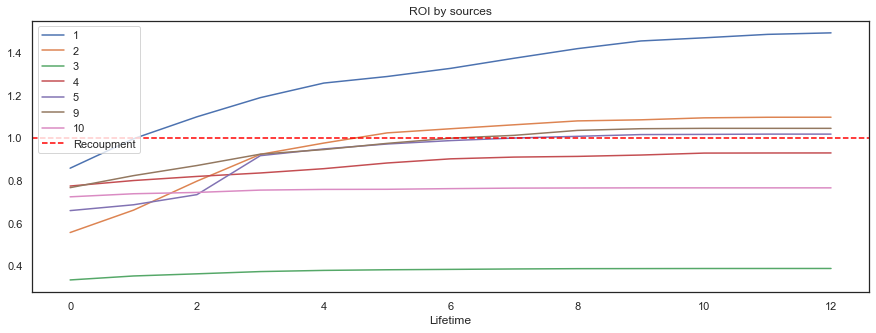

In [82]:
# ROI plot
roi.T.plot(figsize = (15,5))
plt.axhline(y = 1, label = 'Recoupment',color = 'red', linestyle = '--')
plt.title('ROI by sources')
plt.xlabel('Lifetime')
plt.legend()
plt.show()

The graph shows that 1 source paid off almost immediately. 2,5,9 paid off after 6-7 months. The remaining sources did not show a payback for the entire period.

### Conclusion

Important metrics were calculated at this step.
* We learned that a significant number of visits are made from computers(we calculated MAU, WAU, DAU), it may be worth paying attention to the channels of attraction from mobile devices, since it is mobile devices that ensure the growth of traffic on the world Internet.
* Found that users on average spend insufficient time on the site to purchase (ASL). Perhaps we should actively show the possibility of buying and increase the amount of entertainment and / or information content.
* There are problems with user retention. The best indicators were shown by the first cohort, then there was a significant drop in indicators, and the later users were attracted, the earlier the majority began to "fall off". Perhaps the interface has become more complicated over time, or the support has become worse, we need to find out the reasons.
* The average check was calculated and its change over time is shown, the dynamics for 2018 is positive - the average check increased.
* Calculated LTV, CAC, and ROI metrics to optimize marketing costs.

<a id = 'Шаг_3' > </a> 
# Step 3. General conclusion

I would recommend developing attracting channels for mobile devices. At the same time, it is also important not to forget about users from computers, since they bring the main revenue. Money for additional channels of attraction can be found by reducing the cost of non-paying sources. Regarding ROI the third source did not even come close to payback, while the most was spent on it.
Spending on sources 5.9 can also be reduced, while source 1 shows itself to be the most promising, so the budget for it can be increased, as well as the budget for the second source(the highest value of the LTV metric), from these channels it is worth to attract more users.